In [1]:
import pyorc
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
from glob import glob
from Radar import Radar
import matplotlib.pyplot as plt
from datetime import datetime as dt
from matplotlib.colors import Normalize

In [2]:
# videos = []
# for video in sorted(glob("*.mp4", root_dir=f"Videos/")):
#     video not in analyzed and videos.append(video)
dates = [
    "2024-09-12_12-00-04",
    "2024-09-12_13-00-08",
    "2024-09-12_14-00-08",
    "2024-09-12_15-00-07",
    "2024-09-12_16-00-07"
]

In [3]:
date = dates.pop(0)

In [4]:
df = pd.read_csv("RSS_Data_October21.txt")[[
    'TIMESTAMP', 'Average_velocity', 'Tilt_angle_value'
]]
df.TIMESTAMP = pd.to_datetime(df.TIMESTAMP)
df.Average_velocity = df.Average_velocity / 1000
# df

In [5]:
cam = pd.read_csv(f"Results/video_capture_{date}_radar_results.csv")[[
    'time', 'y', 'x', 'v_x', 'v_y', 's2n', 'corr', 'xp', 'yp', 'xs', 'ys'    
]]
cam['velocity'] = np.sqrt(cam.v_x**2 + cam.v_y**2)
cam['datetime'] = dt(2024, 9, 12, 13, 0, 0)
# cam

In [6]:
velocities = []

In [7]:
r = df[df.TIMESTAMP == cam.datetime[0]].Average_velocity[0]

In [8]:
cam = pd.read_csv(f"Results/video_capture_{date}_radar_results.csv")[[
    'time', 'y', 'x', 'v_x', 'v_y', 's2n', 'corr', 'xp', 'yp', 'xs', 'ys'    
]]
cam['velocity'] = np.sqrt(cam.v_x**2 + cam.v_y**2)
cam['datetime'] = dt(2024, 9, 12, 13, 0, 0)
velocities.append(np.average(cam.velocity.dropna()))

In [9]:
cam = pd.read_csv(f"Results/video_capture_{date}_radar_results_mask.csv")[[
    'time', 'y', 'x', 'v_x', 'v_y', 's2n', 'corr', 'xp', 'yp', 'xs', 'ys'    
]]
cam['velocity'] = np.sqrt(cam.v_x**2 + cam.v_y**2)
cam['datetime'] = dt(2024, 9, 12, 13, 0, 0)
velocities.append(np.average(cam.velocity.dropna()))
t = np.average(cam.velocity.dropna())

In [10]:
# cam = pd.read_csv(f"Results/video_capture_{date}_radar_results_mask_avg.csv")[[
#     'y', 'x', 'v_x', 'v_y', 's2n', 'corr', 'xp', 'yp', 'xs', 'ys'    
# ]]
# cam['velocity'] = np.sqrt(cam.v_x**2 + cam.v_y**2)
# cam['datetime'] = dt(2024, 9, 12, 13, 0, 0)
# velocities.append(np.average(cam.velocity.dropna()))

In [11]:
# cam = pd.read_csv(f"Results/video_capture_{date}_radar_results_avg.csv")[[
#     'y', 'x', 'v_x', 'v_y', 's2n', 'corr', 'xp', 'yp', 'xs', 'ys'    
# ]]
# cam['velocity'] = np.sqrt(cam.v_x**2 + cam.v_y**2)
# cam['datetime'] = dt(2024, 9, 12, 13, 0, 0)
# velocities.append(np.average(cam.velocity.dropna()))

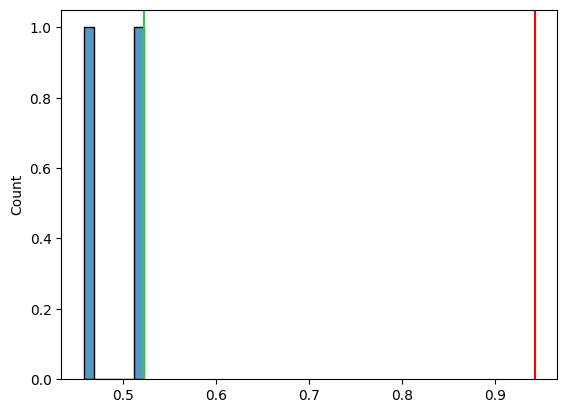

In [12]:
sns.histplot(
    x=velocities,
    binwidth=0.01
)
plt.axvline(x=r, color='red', linestyle='-', linewidth=1.5, label='radar')
plt.axvline(x=t, color='limegreen', linestyle='-', linewidth=1.5, label='radar')

plt.show()